In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import matplotlib as mp
from scipy.interpolate import CubicSpline

In [2]:
mp.rcParams['text.usetex'] = True
mp.rcParams['figure.dpi'] = 130
mp.rcParams['font.family'] = 'serif'
mp.rcParams['ytick.direction'] = 'in'
mp.rcParams['xtick.direction'] = 'in'
mp.rc('savefig', transparent=False, bbox='tight', pad_inches=0.05, format='pdf')

In [3]:
availSrcs = []
# GDR
data_GDR_upper = pd.read_csv("./data/GDR_upper.csv",names=['Esym', 'L']) 
data_GDR_lower = pd.read_csv("./data/GDR_lower.csv",names=['Esym', 'L']) 
spline_GDR_upper=CubicSpline(data_GDR_upper["Esym"],data_GDR_upper["L"])
spline_GDR_lower=CubicSpline(data_GDR_lower["Esym"],data_GDR_lower["L"])
availSrcs.append({"lbl" : "GDR", "col" : "red"})

# HIC
data_HIC_upper = pd.read_csv("./data/HIC_upper.csv",names=['Esym', 'L']) 
data_HIC_lower = pd.read_csv("./data/HIC_lower.csv",names=['Esym', 'L']) 
spline_HIC_upper=CubicSpline(data_HIC_upper["Esym"],data_HIC_upper["L"])
spline_HIC_lower=CubicSpline(data_HIC_lower["Esym"],data_HIC_lower["L"])
availSrcs.append({"lbl" : "HIC", "col" : "green"})

# Sn neutron skin
data_Sn_upper = pd.read_csv("./data/Sn_skin_upper.csv",names=['Esym', 'L']) 
data_Sn_lower = pd.read_csv("./data/Sn_skin_lower.csv",names=['Esym', 'L']) 
spline_Sn_upper=CubicSpline(data_Sn_upper["Esym"],data_Sn_upper["L"])
spline_Sn_lower=CubicSpline(data_Sn_lower["Esym"],data_Sn_lower["L"])
availSrcs.append({"lbl" : "Sn", "col" : "cyan"})

# Pb dipole
data_Pb_upper = pd.read_csv("./data/Pb_dipole_upper.csv",names=['Esym', 'L']) 
data_Pb_lower = pd.read_csv("./data/Pb_dipole_lower.csv",names=['Esym', 'L']) 
spline_Pb_upper=CubicSpline(data_Pb_upper["Esym"],data_Pb_upper["L"])
spline_Pb_lower=CubicSpline(data_Pb_lower["Esym"],data_Pb_lower["L"])
availSrcs.append({"lbl" : "Pb", "col" : "gold"})

# IAS
data_IAS = pd.read_csv("./data/IAS.csv",names=['Esym', 'L']) 
availSrcs.append({"lbl" : "IAS", "col" : "b"})

# masses
data_masses = pd.read_csv("./data/masses.csv",names=['Esym', 'L']) 
availSrcs.append({"lbl" : "masses", "col" : "orange"})

# Hebeler
data_H = pd.read_csv("./data/H.csv",names=['Esym', 'L']) 
availSrcs.append({"lbl" : "H", "col" : "magenta"})

# Gandolfi
data_G = pd.read_csv("./data/G.csv",names=['Esym', 'L']) 
availSrcs.append({"lbl" : "G", "col" : "0.5"})

In [4]:
def getInterp(kind, upperLower, Esym):
    functionName=("spline_"+kind+"_"+upperLower)
    return eval(functionName)(Esym)

In [5]:
regularLineStyle={"ls": "--", "lw" : 0.8}
def plotSource(ax, kind, col, Esym):
    if kind in ["H", "G", "masses", "IAS"]:
        data = "data_" + kind
        pl.fill(eval(data)["Esym"], eval(data)["L"], facecolor=col, edgecolor='k', **regularLineStyle)
    else:
        pl.plot(Esym, getInterp(kind, "lower", Esym), c="k", **regularLineStyle)
        pl.plot(Esym, getInterp(kind, "upper", Esym), c="k", **regularLineStyle)
        pl.fill_between(Esym, getInterp(kind, "lower", Esym),getInterp(kind, "upper", Esym), color=col)

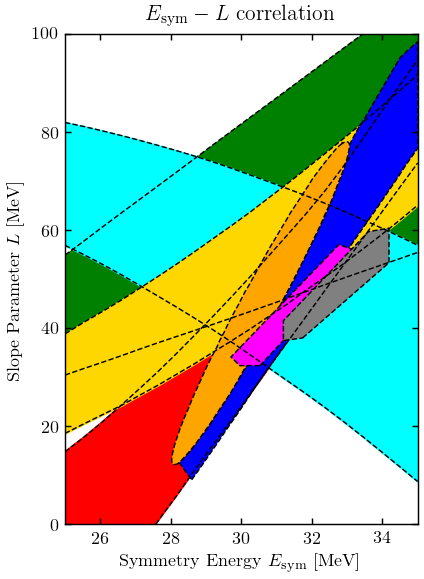

In [6]:
fig, ax = pl.subplots(figsize=(3.5,5))

# sampling points
Esym=np.linspace(25,35,20)

# set labels and title
ax.set_xlabel(r"Symmetry Energy $E_\mathrm{sym}$ [MeV]")
ax.set_ylabel(r"Slope Parameter $L$ [MeV]")
ax.set_title('$E_\mathrm{sym}-L$ correlation')
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')

# set limits
ax.set_xlim(25,35)
ax.set_ylim(0,100)

# plot each source separately
for src in availSrcs:
    plotSource(ax,src["lbl"], src["col"], Esym)
pl.savefig("Lattimer_Esym_L.pdf")